In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

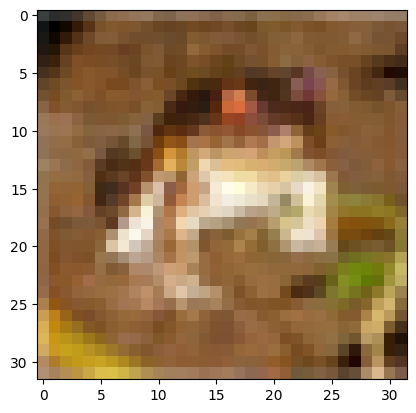

In [5]:
plt.imshow(X_train[0])

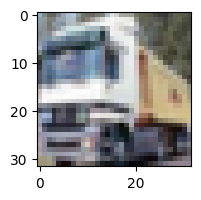

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[1])

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

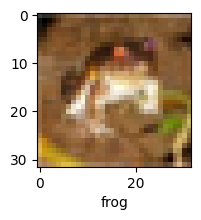

In [11]:
plot_sample(X_train, y_train, 0)

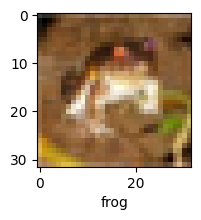

In [12]:
plot_sample(X_train, y_train, 0)

In [13]:
# ANN MODEL
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=2)


C:\Users\Sourabh\Dropbox\PC\Desktop\tensorflow\myenvten\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.1028 - loss: nan
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.0999 - loss: nan


In [14]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1001 - loss: nan


[nan, 0.10000000149011612]

In [ ]:
# from sklearn.metrics import confusion_matrix , classification_report
# import numpy as np
# y_pred = ann.predict(X_test)
# y_pred_classes = [np.argmax(element) for element in y_pred]

# print("Classification Report: \n", classification_report(y_test, y_pred_classes))

In [18]:
# cnn model
cnn = models.Sequential([
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit( X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.2754 - loss: 2.8710
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5191 - loss: 1.3400
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5930 - loss: 1.1597
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6299 - loss: 1.0571
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6605 - loss: 0.9734
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6852 - loss: 0.8992
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7082 - loss: 0.8475
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7200 - loss: 0.8098
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7398 - loss: 0.7528
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7491 - loss: 0.7285


In [92]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6555 - loss: 1.0898


[1.098211646080017, 0.654699981212616]

In [98]:
# y_test
y_test = y_test.reshape(-1,)
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

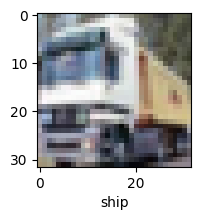

In [99]:
plot_sample(X_test,y_test,1)

In [100]:
y_pred = cnn.predict(X_test)
y_pred[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[3.4119140e-02, 6.3285623e-03, 4.1931956e-03, 9.7203560e-02,
        4.7405276e-02, 6.5755986e-02, 1.3936981e-02, 1.1992408e-02,
        7.1266341e-01, 6.4015249e-03],
       [4.3573654e-03, 8.9583415e-01, 8.0545783e-07, 2.7264898e-06,
        1.4793228e-07, 9.4149366e-10, 7.2414582e-06, 3.3219658e-07,
        8.2559720e-02, 1.7237496e-02],
       [3.7721623e-02, 6.0166883e-01, 2.3151357e-03, 1.8102652e-03,
        3.1855452e-04, 3.3032364e-05, 1.3585076e-03, 6.5030006e-04,
        2.8906196e-01, 6.5061674e-02],
       [1.0147982e-01, 1.0361132e-03, 1.9820895e-02, 1.9652797e-03,
        5.5566040e-04, 6.0878619e-06, 4.4940569e-04, 2.6256585e-04,
        8.7381142e-01, 6.1291305e-04],
       [7.6869968e-04, 2.1481671e-04, 3.7738848e-02, 1.3052517e-01,
        6.1223578e-01, 4.5635097e-02, 1.7109303e-01, 8.8494772e-04,
        6.8183494e-04, 2.2178130e-04],
       [9.5128220e-05, 5.5122498e-05, 5.1766858e-03, 6.2436722e-03,
        8.6525193e-04, 5.8528436e-03, 9.8079991e-01, 7.30

In [87]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[8, 1, 1, 8, 4, 6, 1, 6, 3, 1]

In [88]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

ship
automobile
automobile
ship
deer
frog
automobile
frog
cat
automobile


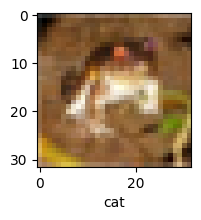

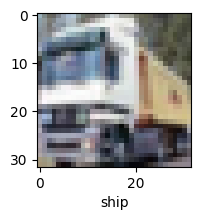

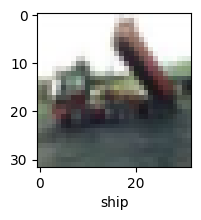

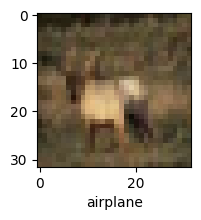

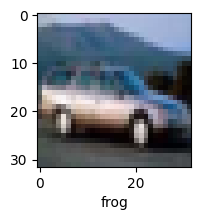

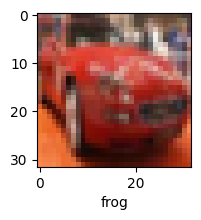

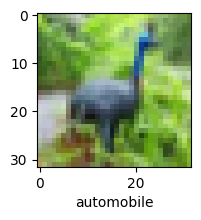

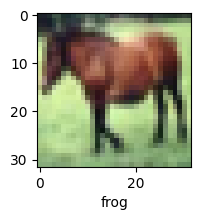

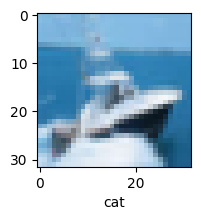

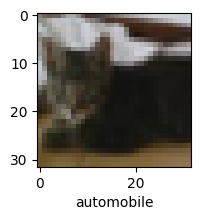

In [89]:
# Print the class names for the first 10 predictions
for i in range(10):
    plot_sample(X_test, y_test,i)
    print(classes[y_classes[i]])